# **Problem 4:**





In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

# A.

In [ ]:
data = pd.read_csv('pima_indians_diabetes.csv')

# Replace zeros with NaN for specific columns where zero is invalid
columns_with_zeros = [
    "diastolic_blood_pressure",
    "triceps_skinfold_thickness",
    "serum_insulin",
    "bmi"
]
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Fill NaN values with the median of each column
data[columns_with_zeros] = data[columns_with_zeros].fillna(data[columns_with_zeros].median())

# Normalize numeric columns to scale data
scaler = MinMaxScaler()
numeric_columns = data.columns[:-1]  
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print("\nPreprocessed Data:")
print(data.head())


Preprocessed Data:
   time_pregnant_no  plasma_concentration  diastolic_blood_pressure  \
0          0.352941              0.743719                  0.489796   
1          0.058824              0.427136                  0.428571   
2          0.470588              0.919598                  0.408163   
3          0.058824              0.447236                  0.428571   
4          0.000000              0.688442                  0.163265   

   triceps_skinfold_thickness  serum_insulin       bmi  diabetes_pedigree  \
0                    0.304348       0.133413  0.314928           0.234415   
1                    0.239130       0.133413  0.171779           0.116567   
2                    0.239130       0.133413  0.104294           0.253629   
3                    0.173913       0.096154  0.202454           0.038002   
4                    0.304348       0.185096  0.509202           0.943638   

        age  class  
0  0.483333      1  
1  0.166667      0  
2  0.183333      1  
3  0.0

In [16]:
X = data.drop('class', axis=1)
y = data['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = [50, 75, 100]
max_features = ['sqrt', 'log2']
max_depth = [10, 20, 30]

results = []

# Testing different combinations of parameters
for n in n_estimators:
    for m in max_features:
        for d in max_depth:
            model = RandomForestClassifier(n_estimators=n, max_features=m, max_depth=d, random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            results.append({'n_estimators': n, 'max_features': m, 'max_depth': d, 'accuracy': accuracy})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Finding the best model
optimal_patameters = results_df.loc[results_df['accuracy'].idxmax()]
print("\nBest Model parameters:")
print(optimal_patameters)

    n_estimators max_features  max_depth  accuracy
0             50         sqrt         10  0.733766
1             50         sqrt         20  0.746753
2             50         sqrt         30  0.746753
3             50         log2         10  0.733766
4             50         log2         20  0.740260
5             50         log2         30  0.740260
6             75         sqrt         10  0.759740
7             75         sqrt         20  0.753247
8             75         sqrt         30  0.759740
9             75         log2         10  0.759740
10            75         log2         20  0.733766
11            75         log2         30  0.733766
12           100         sqrt         10  0.746753
13           100         sqrt         20  0.746753
14           100         sqrt         30  0.746753
15           100         log2         10  0.759740
16           100         log2         20  0.720779
17           100         log2         30  0.720779

Best Model parameters:
n_estim

# B.

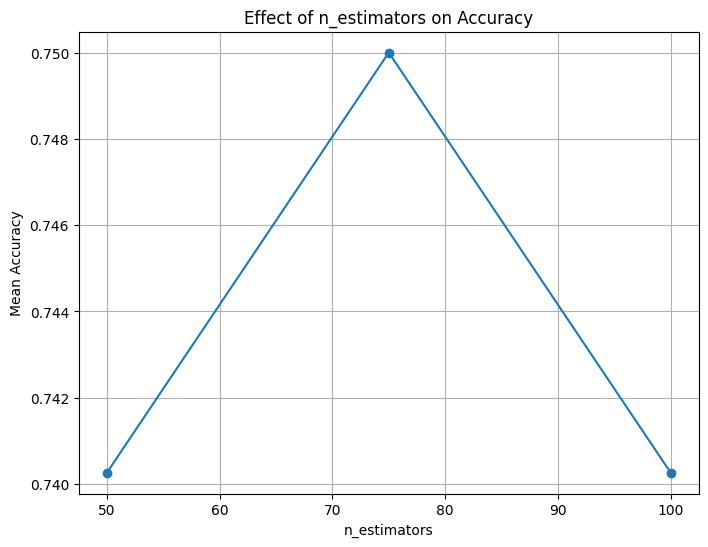

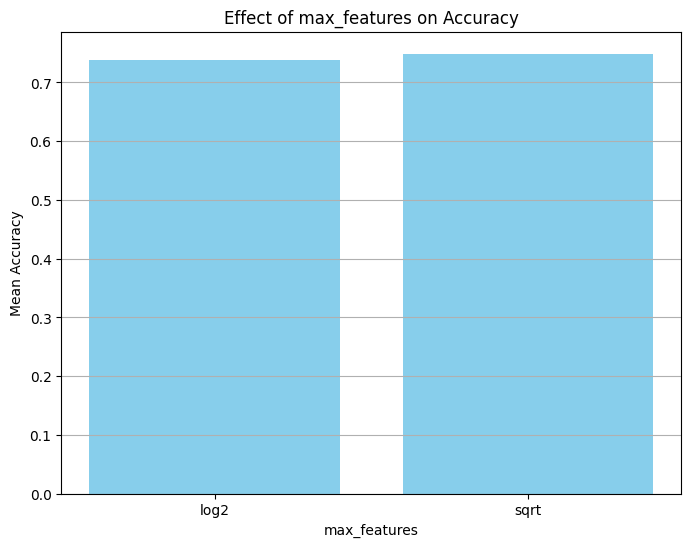

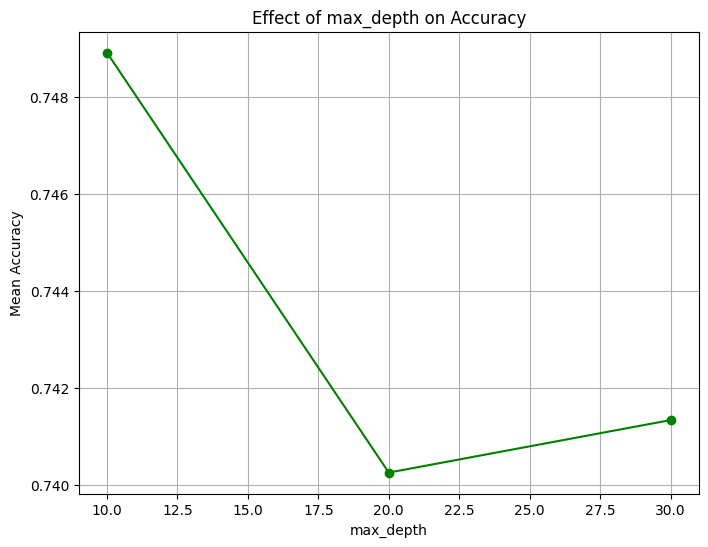

In [17]:
n_estimators_effect = results_df.groupby('n_estimators')['accuracy'].mean()
max_features_effect = results_df.groupby('max_features')['accuracy'].mean()
max_depth_effect = results_df.groupby('max_depth')['accuracy'].mean()

# Plotting the effect of n_estimators
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_effect.index, n_estimators_effect.values, marker='o')
plt.title('Effect of n_estimators on Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# Plotting the effect of max_features
plt.figure(figsize=(8, 6))
plt.bar(max_features_effect.index, max_features_effect.values, color='skyblue')
plt.title('Effect of max_features on Accuracy')
plt.xlabel('max_features')
plt.ylabel('Mean Accuracy')
plt.grid(axis='y')
plt.show()

# Plotting the effect of max_depth
plt.figure(figsize=(8, 6))
plt.plot(max_depth_effect.index, max_depth_effect.values, marker='o', color='green')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# C.

In [ ]:
# Define the models
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=75, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=75, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=75, max_features='sqrt', max_depth=10, random_state=42)
}

# Train and evaluate te models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results.append({"Model": name, "Test Accuracy": test_acc})

results_df = pd.DataFrame(results)
print("\nEnsemble Models Results:")
print(results_df)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Ensemble Models Results:
               Model  Test Accuracy
0  Gradient Boosting       0.733766
1           AdaBoost       0.740260
2        Extra Trees       0.779221
